<a href="https://colab.research.google.com/github/bedigambar/Medical-Insurance-Cost-Predictor-Model/blob/main/Medical_Insurance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [30]:
# Loading the dataset
insurance_data = pd.read_csv('insurance.csv')

In [31]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
insurance_data.shape

(1338, 7)

In [34]:
insurance_data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


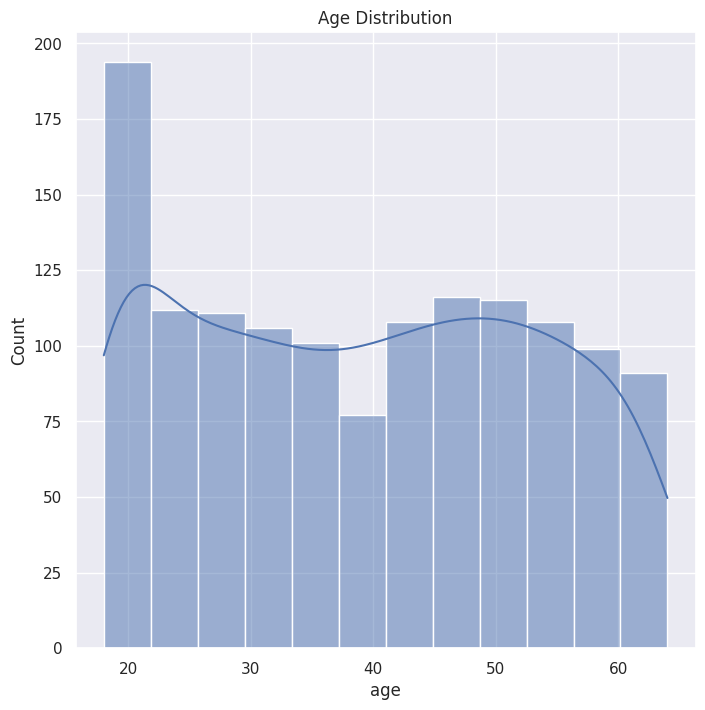

In [35]:
# Creating a distribution plot for the 'age' column
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(insurance_data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

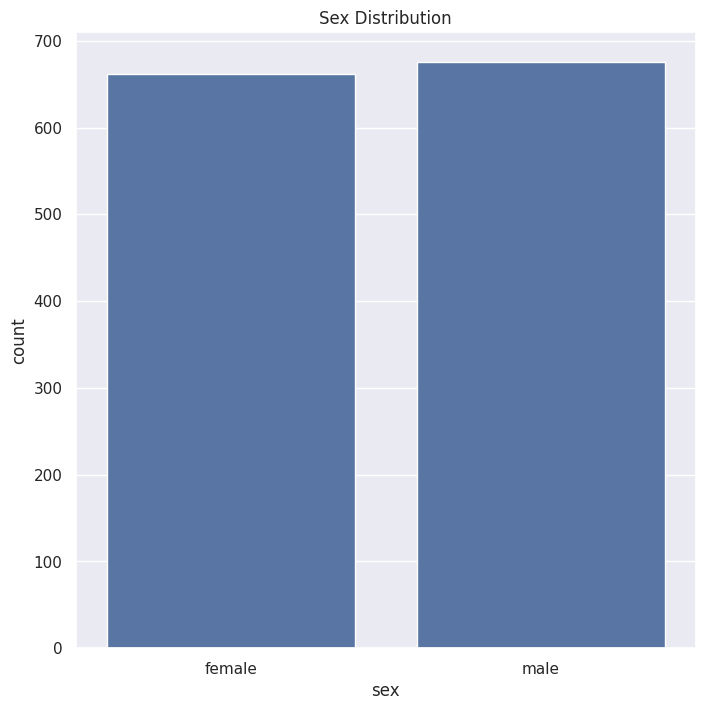

In [36]:
# Creating a count plot for the 'sex' column
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

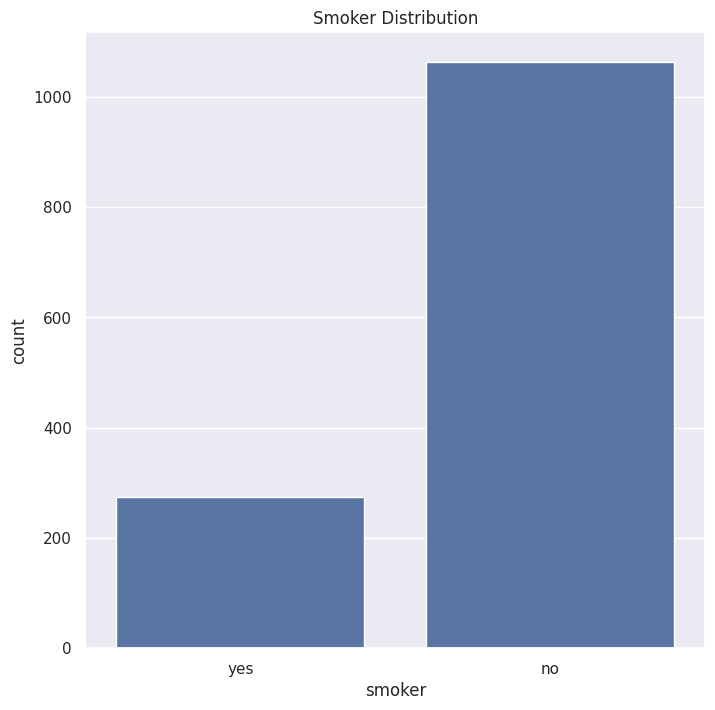

In [37]:
# Creating a count plot for the 'smoker' column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

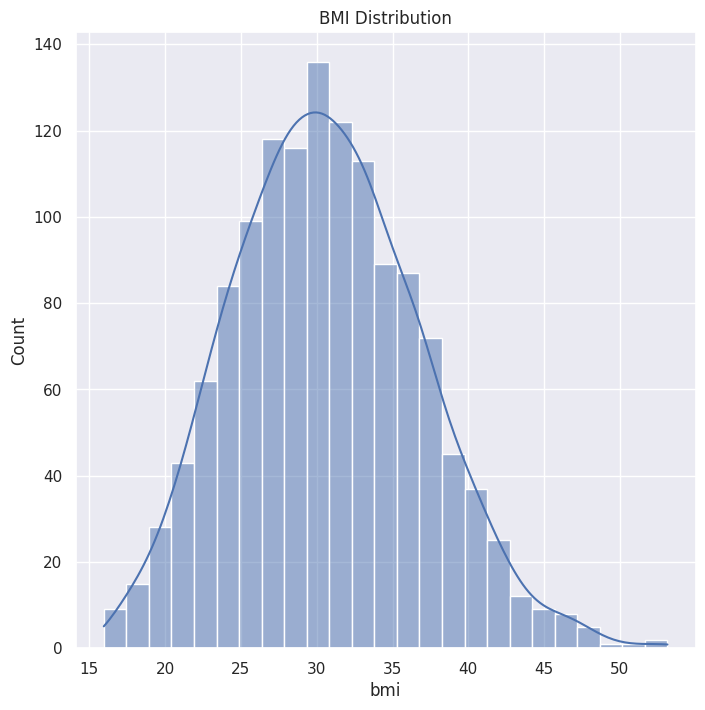

In [38]:
# Creating a distribution plot for the 'bmi' column
plt.figure(figsize=(8,8))
sns.histplot(insurance_data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

In [39]:
# Lists of column names based on their data type or nature
discrete_count=['children']
continous=['age', 'bmi', 'charges']
categorical=['sex', 'smoker', 'region']

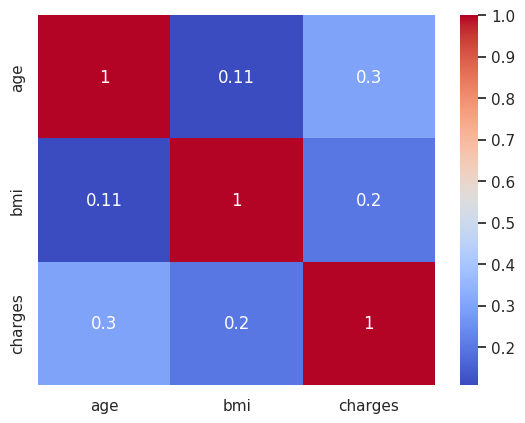

In [40]:
# Correlation matrix for the continuous numerical columns
correlation = insurance_data[continous].corr()
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

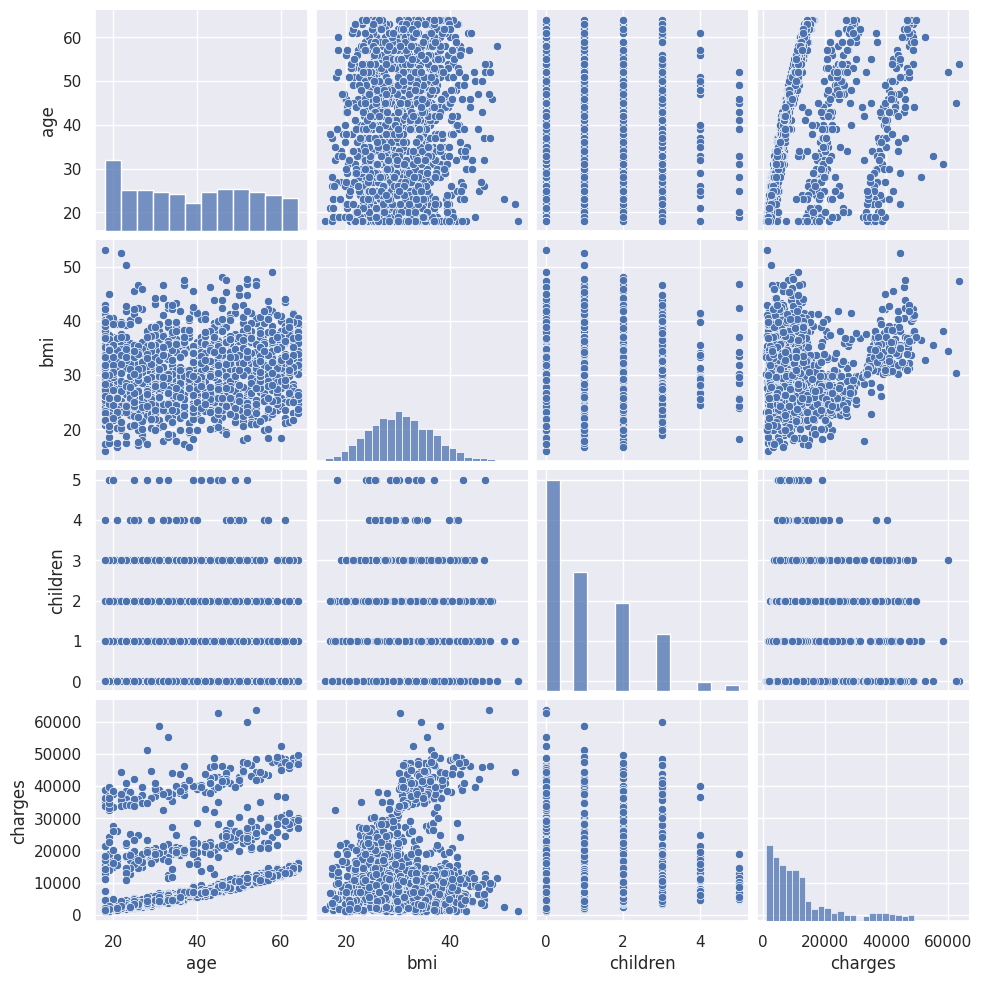

In [41]:
# Creating a pair plot to visualize pairwise relationships between variables
sns.pairplot(insurance_data)
plt.show()

In [42]:
# Checking for missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [43]:
# Value counts for the 'region' column
insurance_data.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [44]:
# Replacing categorical values with numerical representations
insurance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace=True)
insurance_data.replace({"sex": {"male": 0, "female": 1}}, inplace=True)
insurance_data.replace({"smoker": {"yes": 0, "no": 1}}, inplace=True)

/tmp/ipython-input-2831241565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace=True)
/tmp/ipython-input-2831241565.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({"sex": {"male": 0, "female": 1}}, inplace=True)
/tmp/ipython-input-2831241565.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

In [45]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [46]:
X = insurance_data.drop(columns='charges', axis=1)
y = insurance_data['charges']

In [47]:
linregressor = LinearRegression()

In [48]:
poly_reg = PolynomialFeatures(degree=2)

In [49]:
X_poly = poly_reg.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=2)

In [51]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred_train = linregressor.predict(X_train)

r2_train = metrics.r2_score(y_train, y_pred_train)
print("R2 score on train data: ", r2_train)

R2 score on train data:  0.8431614000008123


In [53]:
y_pred_test = linregressor.predict(X_test)

r2_test = metrics.r2_score(y_test, y_pred_test)
print("R2 score on test data: ", r2_test)

R2 score on test data:  0.8521473006489979


In [54]:
# Example of a new data point for prediction
new_data = pd.DataFrame({
    'age': [30],
    'sex': [1], # 1 for female, 0 for male
    'bmi': [25.5],
    'children': [2],
    'smoker': [1], # 1 for no, 0 for yes
    'region': [2] # 0: southeast, 1: southwest, 2: northeast, 3: northwest
})

poly = PolynomialFeatures(degree=2)
new_data_poly = poly.fit_transform(new_data)

predicted_charges = linregressor.predict(new_data_poly)

print(f"Predicted charges for this patient: ${predicted_charges[0]:.2f}")

Predicted charges for this patient: $7297.48


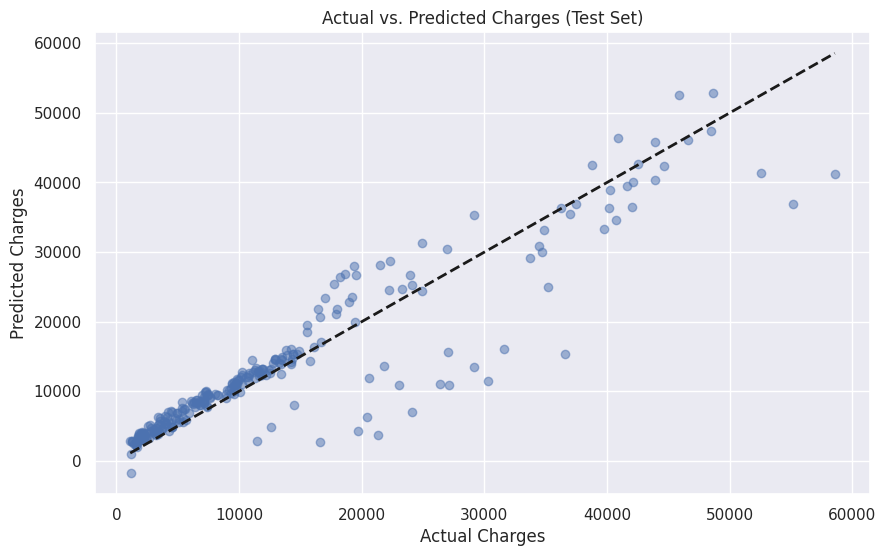

In [55]:
# Visualize the actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

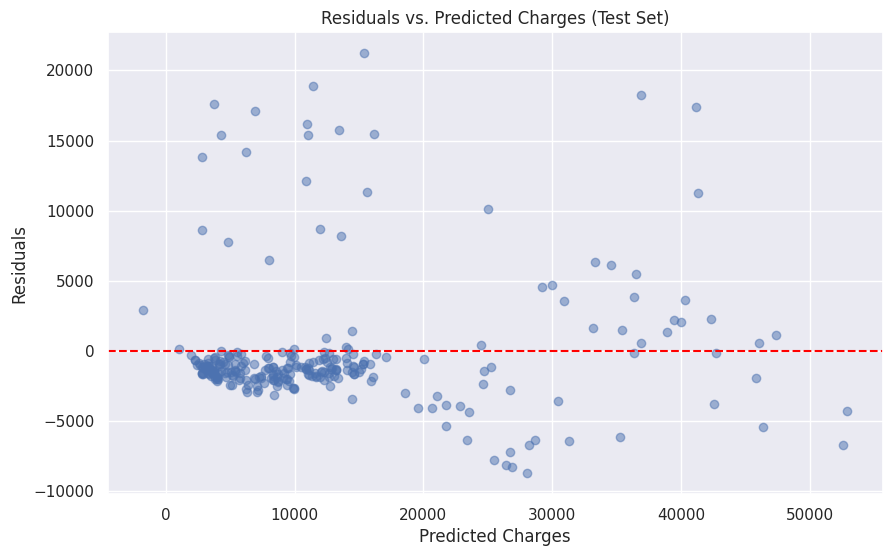

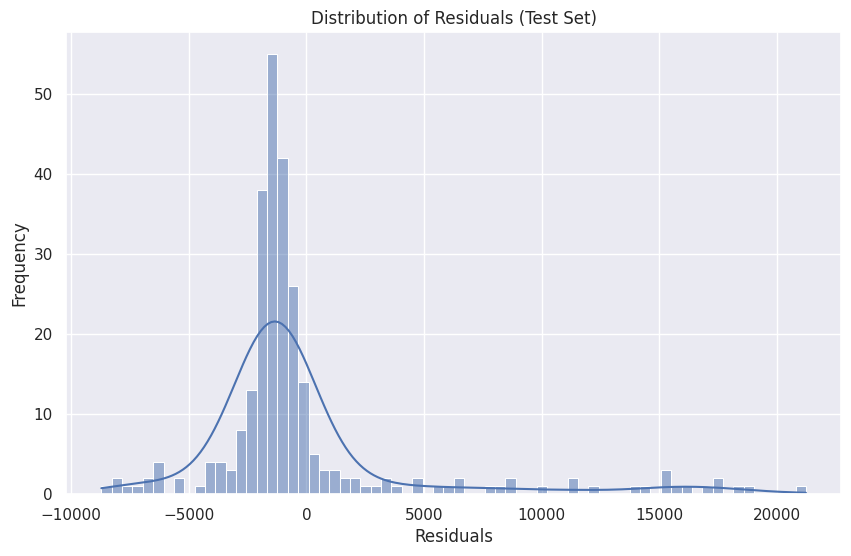

In [56]:
# Calculating and visualizing the residuals to assess model performance.
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Charges (Test Set)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Test Set)")
plt.show()